In [20]:
import sys
import os
sys.path.append(os.pardir)

from common import bodeplot_set, linestyle_generator  # noqa: F403


9.81


c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


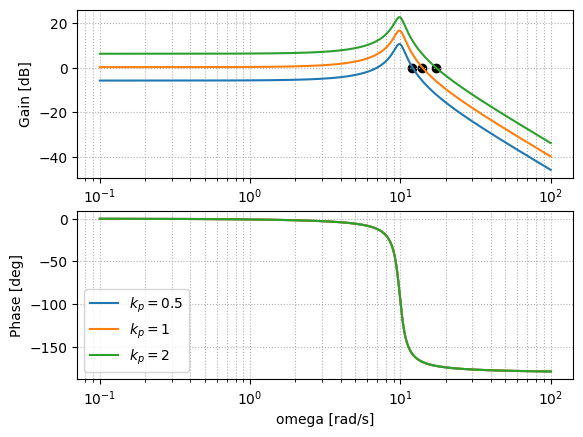

In [21]:
from control.matlab import tf, bode, logspace, mag2db, margin, TransferFunction
import matplotlib.pyplot as plt
import numpy as np

# アームのモデル
g : float = 9.81
l = 0.2 # アームの長さ[m]  # noqa: E741
M = 0.5 # アームの質量[kg]
mu = 1.5e-2  # 粘性摩擦係数[N/m/s]
J = 1.0e-2   # 慣性モーメント[Nm]
print(g)

P = tf([0, 1], [J, mu, M * g * l])
assert isinstance(P, TransferFunction)

ref = 30

kps = [0.5, 1, 2] # 比例ゲイン
fig, ax = plt.subplots(2, 1)
for kp in kps:
    K = tf([0, kp], [0, 1])
    H = P * K
    mag, phase, w = bode(H, logspace(-1, 2, 1000), plot=False)
    pltargs = {'ls': '-', 'label': f'$k_p={kp}$'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

    gm, pm, wpc, wgc = margin(H)
    ax[0].scatter(wgc, 0, color='k')

bodeplot_set(ax, 3)


c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\margins.py:378: RuntimeWarning: invalid value encountered in less_equal
  w_180 = w_180[w180_resp <= 0.]
c:\Users\asei\control.py\.venv\Lib\site-packages\control\margins.py:379: RuntimeWarning: invalid value encountered in less_equal
  w180_resp = w180_resp[w180_resp <= 0.]
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


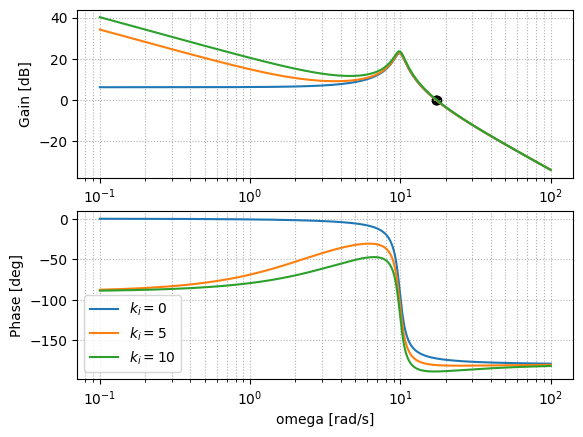

In [24]:
kp = 2 # 比例ゲイン
kis = [0, 5, 10] # 積分ゲイン
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)

assert isinstance(P, TransferFunction)

for ki in kis:
    K = tf([kp, ki], [1, 0])
    H = P * K
    mag, phase, w = bode(H, logspace(-1, 2, 1000), plot=False)
    pltargs = {'ls': '-', 'label': f'$k_i={ki}$'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

    gm, pm, wpc, wgc = margin(H)
    ax[0].scatter(wgc, 0, color='k')

bodeplot_set(ax, 3)